In [1]:
from pathlib import Path
from utils.vis_utils import model_params,visualization_pre,visualization_bbox, visualization_bbox_dir,visualization_pre_dir
from utils.eff_utils import load_yaml
path = Path.cwd()

/home/mazheng/miniconda3/envs/eff/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '1'

In [3]:
project_name = "untunnel-detection"
compound_coef = 2
threshold = 0.2
iou_threshold = 0.2
model_path = 'weights/untunnel/2.5/efficientdet-d2_99_6000.pth'

In [4]:
ann_json = path / 'datasets/{}/annotations/instances_val.json'.format(project_name)
# ann_json = path / 'datasets/4-4/annotations/instances_val.json'
img_path = path / 'datasets/{}/val'.format(project_name)
# img_path = Path('datasets/4-4')
# yaml_path = path / 'projects/{}.yml'.format(project_name)
yaml_path = 'tmp_weights/untunnel/untunnel-detection.yml'

project_params = load_yaml(str(yaml_path))

ratios=eval(project_params['anchors_ratios'])
scales=eval(project_params['anchors_scales'])
# scales=[(2 ** 0)/2, (2 ** (1.0 / 3.0))/2, (2 ** (2.0 / 3.0))/2]
# ratios=[(0.6, 1.6), (1.2, 0.8), (1.7, 0.6)]
obj_list = project_params['obj_list']
params = model_params(compound_coef, obj_list, ratios, scales, model_path)

In [5]:
params

model_params(compound_coef=2, obj_list=['spiledmaterial', 'person', 'crack', 'potholes', 'pounding', 'label', 'indicator', 'lamplight', 'animal'], ratios=[(0.6, 1.6), (1.2, 0.8), (1.7, 0.6)], scales=[0.4, 0.5039684199579493, 0.6349604207872798], model_path='weights/untunnel/2.5/efficientdet-d2_99_6000.pth')

In [6]:
# visualization_bbox_dir(str(ann_json),str(img_path),"fig/{}/val/true_bbox".format(project_name))
# visualization_pre_dir(params, str(img_path), threshold, iou_threshold, save_path="fig/{}/4-4/pre_bbox".format(project_name))

In [7]:
from utils.utils import (
    plot_one_box,
    STANDARD_COLORS,
    standard_to_bgr,
)
import cv2
from pycocotools.coco import COCO
from matplotlib import pyplot as plt

In [8]:
obj_list

['spiledmaterial',
 'person',
 'crack',
 'potholes',
 'pounding',
 'label',
 'indicator',
 'lamplight',
 'animal']

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
(255, 255, 240)


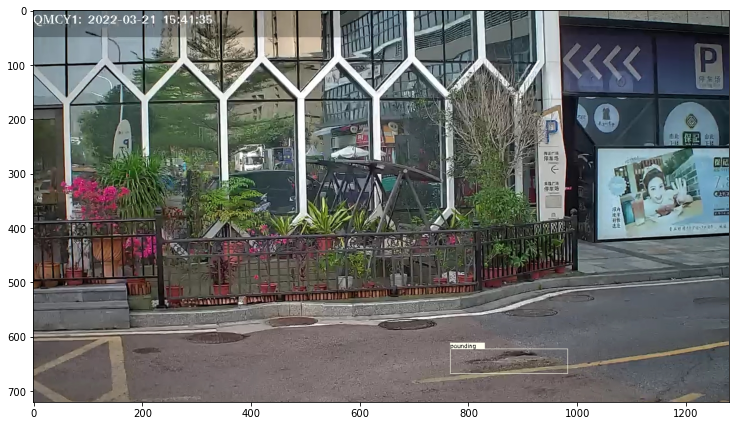

In [10]:
img_name = "KC1314.jpg"
visualization_bbox(img_name,str(ann_json),str(img_path))

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


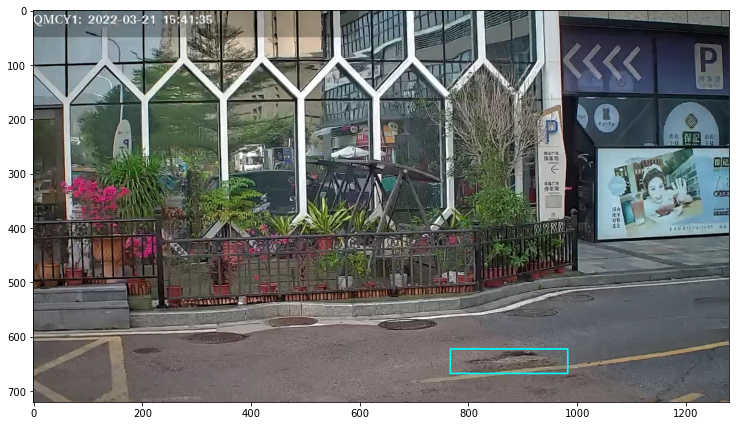

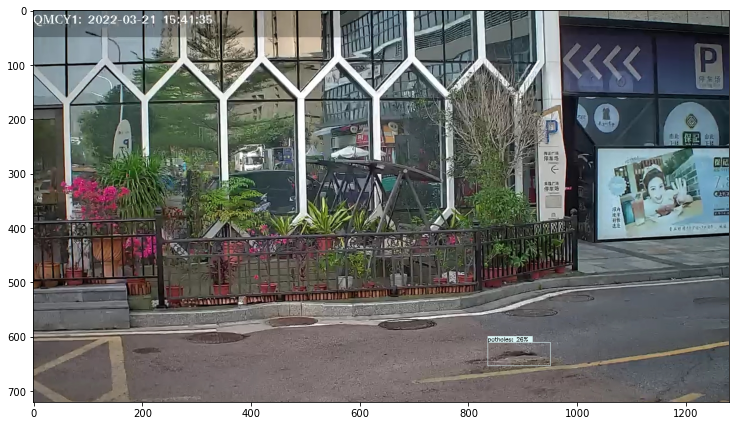

In [11]:
img_name = "KC1314.jpg"
visualization_bbox(img_name,str(ann_json),str(img_path))
visualization_pre(
    params,
    str(img_path/img_name),
    threshold,
    iou_threshold,
)

In [91]:
img_name_list = []
for f in img_path.iterdir():
    img_name_list.append(f.name)

In [197]:
i = 0

JS12102.jpg
loading annotations into memory...
Done (t=0.10s)
creating index...
index created!


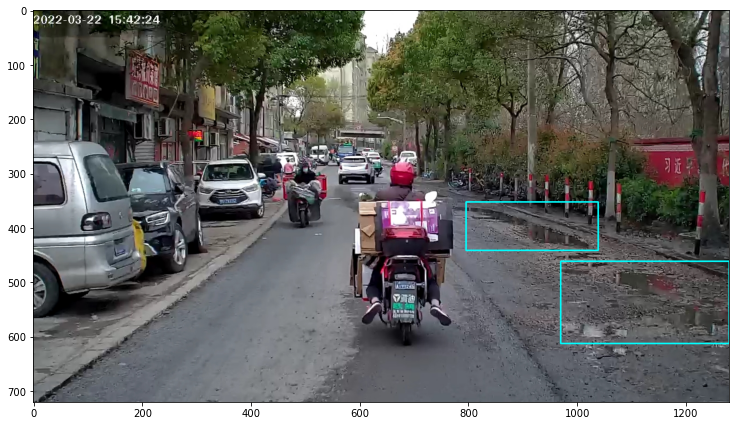

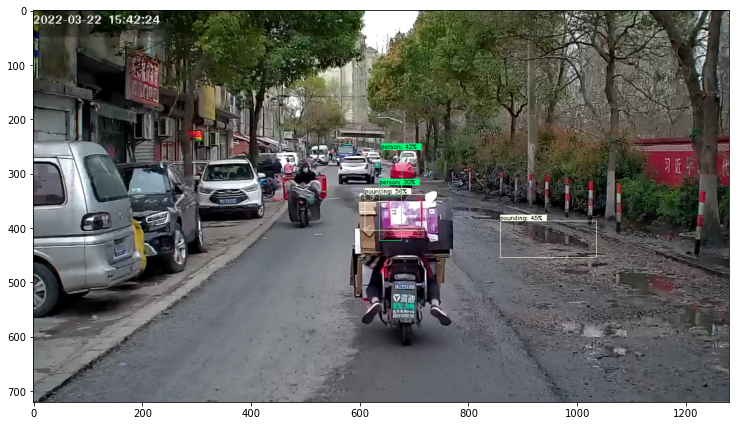

In [231]:
img_name = img_name_list[i]
print(img_name)
visualization_bbox(img_name,str(ann_json),str(img_path))
visualization_pre(
    params,
    str(img_path/img_name),
    threshold,
    iou_threshold,
        force_input_size=1024
)
i+=1


In [199]:
os.environ["WEIGHT_PATH"] = str(model_path)
os.environ["COEF"] = str(compound_coef)
os.environ["PROJECT"] = str(project_name)
# !$WEIGHT_DIR
# ! echo $COEF
! python coco_eval.py -c $COEF -p $PROJECT -w $WEIGHT_PATH -f 4

running coco-style evaluation on project untunnel-detection, weights weights/untunnel/2.5/efficientdet-d2_99_6000.pth...
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
100%|█████████████████████████████████████████| 121/121 [00:13<00:00,  9.22it/s]
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
BBox
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.05s).
Accumulating evaluation results...
bbox_count: 48
tp: 18.0
fp: 18.0
fn: 30.0
bbox_count: 80
tp: 38.0
fp: 101.0
fn: 42.0
bbox_count: 45
tp: 9.0
fp: 53.0
fn: 36.0
bbox_count: 25
tp: 4.0
fp: 39.0
fn: 21.0
bbox_count: 43
tp: 6.0
fp: 54.0
fn: 37.0
bbox_count: 4
tp: 0.0
fp: 21.0
fn: 4.0
bbox_count: 1
tp: 0.0
fp: 4.0
fn: 1.0
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.50 | area=   all | maxDets=100 ] = 0.108
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   

In [87]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

In [88]:
# SET_NAME = ann_path_val
VAL_GT = str(ann_json)
VAL_IMGS = str(img_path)
pred_json_path = 'val_bbox_results.json'
MAX_IMAGES = 10000
coco_gt = COCO(VAL_GT)
image_ids = coco_gt.getImgIds()[:MAX_IMAGES]

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [90]:
# _eval(coco_gt, image_ids, pred_json_path)
coco_pred = coco_gt.loadRes(pred_json_path)

# run COCO evaluation
print("BBox")
coco_eval = COCOeval(coco_gt, coco_pred, "bbox")
coco_eval.params.imgIds = image_ids
coco_eval.params.catIds = [2]
coco_eval.params.iouThrs = [0.2]
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
BBox
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
bbox_count: 80
tp: 53.0
fp: 86.0
fn: 27.0
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.20:0.20 | area=   all | maxDets=100 ] = 0.422
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.20:0.20 | area= small | maxDets=100 ] = 0.101
 Average Precision  (AP) @[ IoU=0.20:0.20 | area=medium | maxDets=100 ] = 0.406
 Average Precision  (AP) @[ IoU=0.20:0.20 | area= large | maxDets=100 ] = 0.953
 Average Recall     (AR) @[ IoU=0.20:0.20 | area=   all | maxDets=  1 ] = 0.325
 Average Recall     (AR) @[ IoU=0.20:0.20 | area=   all | maxDets= 10 ] = 0.662
 Average Recall     (AR) @[ IoU=0.20:0.20 | area=   all | maxDets=100 ] = 0.662
 Average Recall    

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


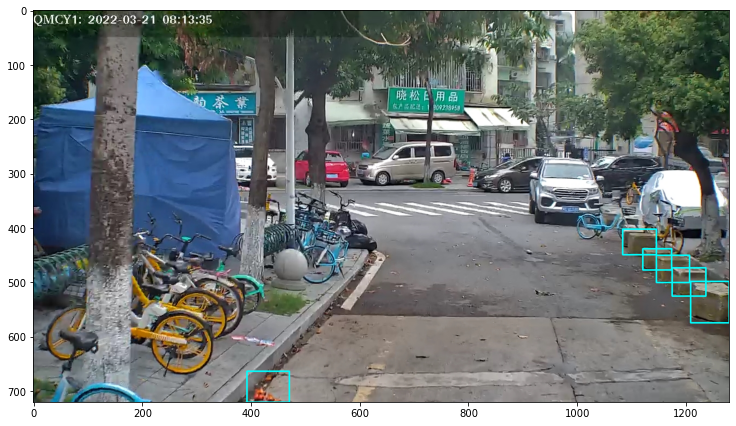

In [15]:
import cv2
from pycocotools.coco import COCO
from matplotlib import pyplot as plt

coco = COCO(str(ann_json))

# plt.rcParams["figure.figsize"] = (12.8, 7.2)

list_imgIds = coco.getImgIds()  # 获取含有该给定类别的所有图片的id
# print(list_imgIds)
for i in list_imgIds:
    img = coco.loadImgs(list_imgIds[i])[0]
    # print(img["file_name"])
    if img["file_name"] == img_name:
        image = cv2.imread(str(img_path) + "/" + img["file_name"])  # 读取图像
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_name = img["file_name"]  # 读取图像名字
        image_id = img["id"]  # 读取图像id

        img_annIds = coco.getAnnIds(imgIds=image_id)
        img_anns = coco.loadAnns(img_annIds)

        for i in range(len(img_annIds)):
            x, y, w, h = img_anns[i]["bbox"]  # 读取边框
            # image = cv2.rectangle(
            #     image,
            #     (int(x), int(y)),
            #     (int(x + w), int(y + h)),
            #     (0, 255, 255),
            #     2,
            # )
            plot_one_box(
                image,
                [x, y, x + w, y + h],
                label=img_anns,
                score=score,
                color=color_list[get_index_label(obj, obj_list)],
            )

        plt.imshow(image)
        plt.show()
